In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import json
import datetime
import seaborn as sns

In [2]:
plt.rcParams.update({'figure.autolayout': True})
plt.rcParams["figure.figsize"] = (12,8)

# Load and flatten json data into dataframe

In [3]:
raw_data = pd.read_json("data/gh-atlas-18-08-2021.json")

In [4]:
df = pd.DataFrame(data=raw_data)

In [5]:
df.head()

,id,number,title,state,isDraft,createdAt,merged,mergedAt,closed,closedAt,...,additions,deletions,changedFiles,baseRefName,headRefName,commits,author,comments,reviews,reviewRequests
0,MDExOlB1bGxSZXF1ZXN0NDY3MjQ1Mzgx,3,Added TS service with architecture API,MERGED,False,2020-08-13T08:52:04Z,True,2020-08-13T08:55:32Z,True,2020-08-13T08:55:32Z,...,8822,1,40,master,ATLAS-1,{'totalCount': 2},{'login': 'Xavier-explore-dev'},"{'totalCount': 0, 'nodes': []}","{'totalCount': 0, 'nodes': []}","{'totalCount': 2, 'nodes': [{'requestedReviewe..."
1,MDExOlB1bGxSZXF1ZXN0NDY3MjQ1Nzk2,4,Basic project overview: communication between ...,MERGED,False,2020-08-13T08:52:50Z,True,2020-08-13T08:55:01Z,True,2020-08-13T08:55:01Z,...,385,0,11,master,atlas-2,{'totalCount': 2},{'login': 'marcelosousa'},"{'totalCount': 0, 'nodes': []}","{'totalCount': 1, 'nodes': [{'createdAt': '202...","{'totalCount': 0, 'nodes': []}"
2,MDExOlB1bGxSZXF1ZXN0NDY3NDQ5ODk5,10,Adds orchestrator service,MERGED,False,2020-08-13T15:11:45Z,True,2020-08-14T13:35:18Z,True,2020-08-14T13:35:18Z,...,395,73,15,master,ATLAS-6,{'totalCount': 4},{'login': 'Xavier-explore-dev'},"{'totalCount': 0, 'nodes': []}","{'totalCount': 10, 'nodes': [{'createdAt': '20...","{'totalCount': 1, 'nodes': [{'requestedReviewe..."
3,MDExOlB1bGxSZXF1ZXN0NDY3NDUxMjQz,11,Architecture endpoint,MERGED,False,2020-08-13T15:13:37Z,True,2020-08-14T13:40:24Z,True,2020-08-14T13:40:24Z,...,317,7,9,master,ATLAS-5,{'totalCount': 8},{'login': 'Xavier-explore-dev'},"{'totalCount': 0, 'nodes': []}","{'totalCount': 0, 'nodes': []}","{'totalCount': 1, 'nodes': [{'requestedReviewe..."
4,MDExOlB1bGxSZXF1ZXN0NDY3NDcwNDA1,12,Add basic data structures to Atlas core,MERGED,False,2020-08-13T15:45:26Z,True,2020-08-13T17:38:50Z,True,2020-08-13T17:38:51Z,...,184,0,5,master,ATLAS-7,{'totalCount': 5},{'login': 'ruimiguelsantos'},"{'totalCount': 0, 'nodes': []}","{'totalCount': 2, 'nodes': [{'createdAt': '202...","{'totalCount': 0, 'nodes': []}"


In [6]:
len(df)

448

In [7]:
df['state'].value_counts()

MERGED    421
CLOSED     25
OPEN        2
Name: state, dtype: int64

In [8]:
df_json = df.to_json(orient='records')
flatten_df = pd.json_normalize(json.loads(df_json), meta=['id'])

### Filter merged pull requests

In [9]:
len(flatten_df[flatten_df.merged])

421

In [10]:
df_merged = flatten_df[flatten_df.merged]

In [11]:
df_merged.head()

,id,number,title,state,isDraft,createdAt,merged,mergedAt,closed,closedAt,...,baseRefName,headRefName,commits.totalCount,author.login,comments.totalCount,comments.nodes,reviews.totalCount,reviews.nodes,reviewRequests.totalCount,reviewRequests.nodes
0,MDExOlB1bGxSZXF1ZXN0NDY3MjQ1Mzgx,3,Added TS service with architecture API,MERGED,False,2020-08-13T08:52:04Z,True,2020-08-13T08:55:32Z,True,2020-08-13T08:55:32Z,...,master,ATLAS-1,2,Xavier-explore-dev,0,[],0,[],2,"[{'requestedReviewer': {'__typename': 'User', ..."
1,MDExOlB1bGxSZXF1ZXN0NDY3MjQ1Nzk2,4,Basic project overview: communication between ...,MERGED,False,2020-08-13T08:52:50Z,True,2020-08-13T08:55:01Z,True,2020-08-13T08:55:01Z,...,master,atlas-2,2,marcelosousa,0,[],1,"[{'createdAt': '2020-08-13T08:54:45Z', 'author...",0,[]
2,MDExOlB1bGxSZXF1ZXN0NDY3NDQ5ODk5,10,Adds orchestrator service,MERGED,False,2020-08-13T15:11:45Z,True,2020-08-14T13:35:18Z,True,2020-08-14T13:35:18Z,...,master,ATLAS-6,4,Xavier-explore-dev,0,[],10,"[{'createdAt': '2020-08-13T15:23:06Z', 'author...",1,"[{'requestedReviewer': {'__typename': 'User', ..."
3,MDExOlB1bGxSZXF1ZXN0NDY3NDUxMjQz,11,Architecture endpoint,MERGED,False,2020-08-13T15:13:37Z,True,2020-08-14T13:40:24Z,True,2020-08-14T13:40:24Z,...,master,ATLAS-5,8,Xavier-explore-dev,0,[],0,[],1,"[{'requestedReviewer': {'__typename': 'User', ..."
4,MDExOlB1bGxSZXF1ZXN0NDY3NDcwNDA1,12,Add basic data structures to Atlas core,MERGED,False,2020-08-13T15:45:26Z,True,2020-08-13T17:38:50Z,True,2020-08-13T17:38:51Z,...,master,ATLAS-7,5,ruimiguelsantos,0,[],2,"[{'createdAt': '2020-08-13T15:47:24Z', 'author...",0,[]


# Profiling

### Pull Request author distribution

In [12]:
df_merged['author.login'].value_counts()

Xavier-explore-dev    205
marcelosousa          115
ruimiguelsantos        81
arcmarqs                7
explore-dev-team        7
WillGAndre              5
ferreiratiago           1
Name: author.login, dtype: int64

## Time to merge

In [14]:
df_merged.loc[:,'mergedAt'] = pd.to_datetime(df_merged.loc[:,'mergedAt'], infer_datetime_format=True)
df_merged.loc[:,'createdAt'] = pd.to_datetime(df_merged.loc[:,'createdAt'], infer_datetime_format=True)
df_merged.loc[:,'time_to_merge_hours'] = (df_merged.mergedAt - df_merged.createdAt) / pd.Timedelta(hours=1)
df_merged.loc[:,'log_time_to_merge_days'] = np.log2((df_merged.mergedAt - df_merged.createdAt) / pd.Timedelta(days=1))
df_merged.loc[:,'timeToMergeRank'] = df_merged.loc[:,'time_to_merge_hours'].rank(method='min', pct=True)

In [15]:
df_merged['time_to_merge_hours'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

0.10       0.265278
0.20       0.766944
0.30       1.722778
0.40       3.966944
0.50      14.173611
0.60      19.033611
0.70      25.641667
0.80      70.243333
0.90     169.412778
0.95     313.525000
0.99     647.485000
1.00    2038.384444
Name: time_to_merge_hours, dtype: float64

### Explanation: 
- As the previous table shows, 50% of the merged pull requests are merged in 14 hours. 
- The 80% mark is at the 70 hours.
- The average wouldn't be meaningful because the distribution is very skewed.

### Plot of time to merge over the last year

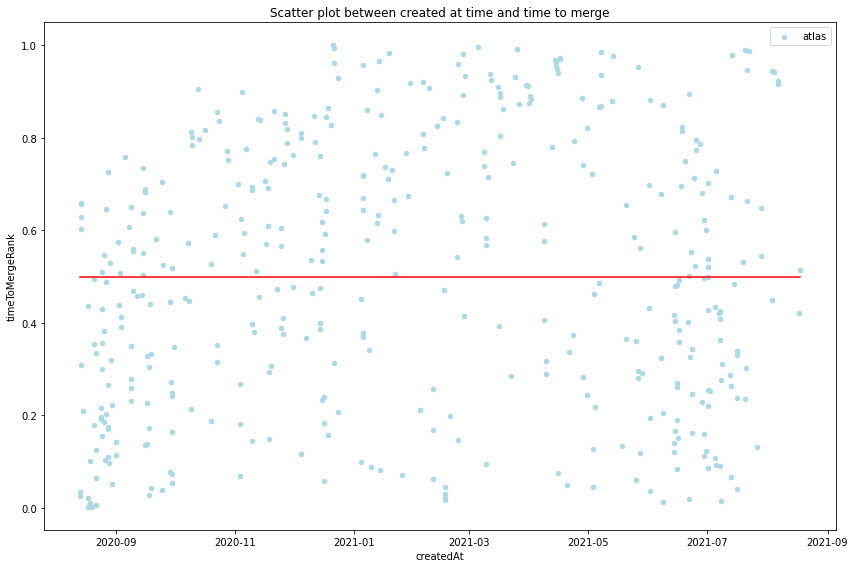

In [16]:
df_merged.plot.scatter(x='createdAt', y='timeToMergeRank', title= "Scatter plot between created at time and time to merge", color='LightBlue', label='atlas');
plt.plot([df_merged['createdAt'].min(), df_merged['createdAt'].max()], [0.5, 0.5], color = 'r')
plt.show(block=True);

### Explanation:
- Each dot in the graph is a pull request
- Dots that are very close to 0 probably mean pull requests that didn't have reviews (their time to merge was very low compared to the rest)
- As time progresses, the time to merge should be going down or closer to the red line (which is the 50% percentile)
- One criticism of this graph is that because the time to merge rank is computed based on all the data, if suddenly there were 50 pull requests with a low time to merge, this could potentially push other pull requests to a higher percentile. In other words, this graph is dynamic in that a position of a pull request in the time to time rank will change with more data.

### Number of pull requests created per month

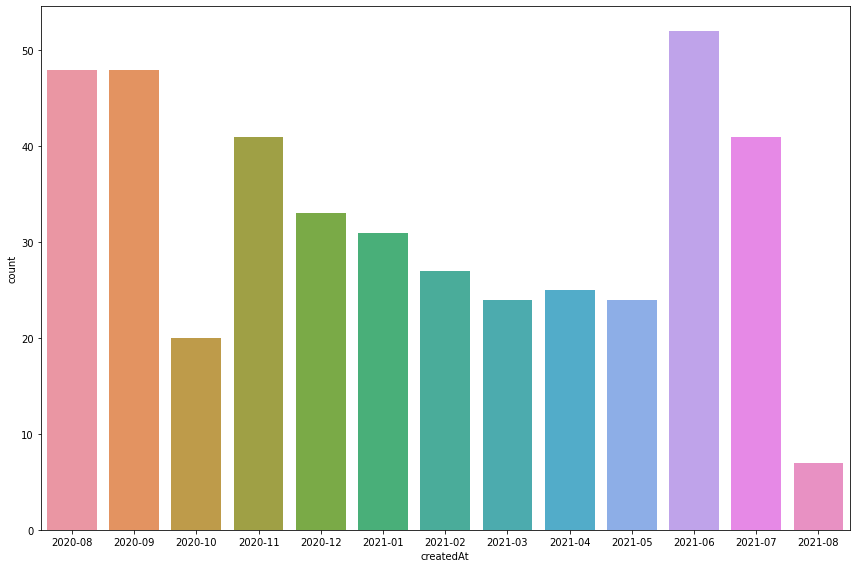

In [17]:
ax = sns.countplot(x=df_merged['createdAt'].dt.to_period('M'), data=df_merged)

### Distribution of pull requests per author and month

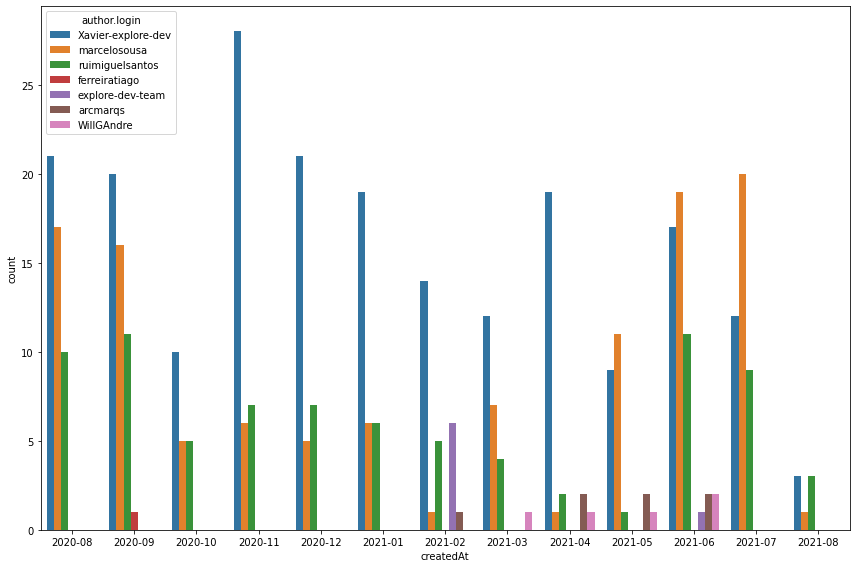

In [18]:
ax = sns.countplot(x=df_merged['createdAt'].dt.to_period('M'), hue='author.login', data=df_merged)

### Histogram of reviews

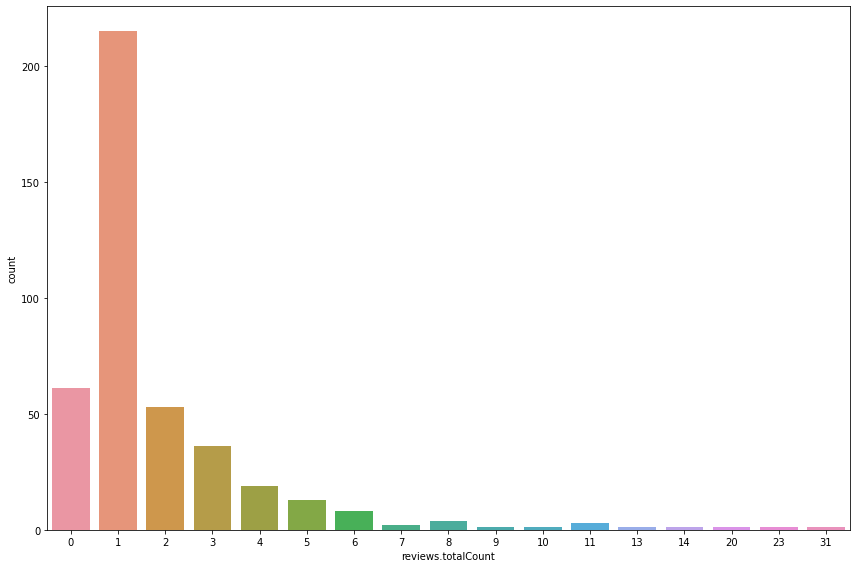

In [19]:
ax = sns.countplot(x=df_merged['reviews.totalCount'], data=df_merged)

In [20]:
df_merged['reviews.totalCount'].value_counts()

1     215
0      61
2      53
3      36
4      19
5      13
6       8
8       4
11      3
7       2
9       1
10      1
13      1
14      1
20      1
23      1
31      1
Name: reviews.totalCount, dtype: int64

### Histogram of review requests

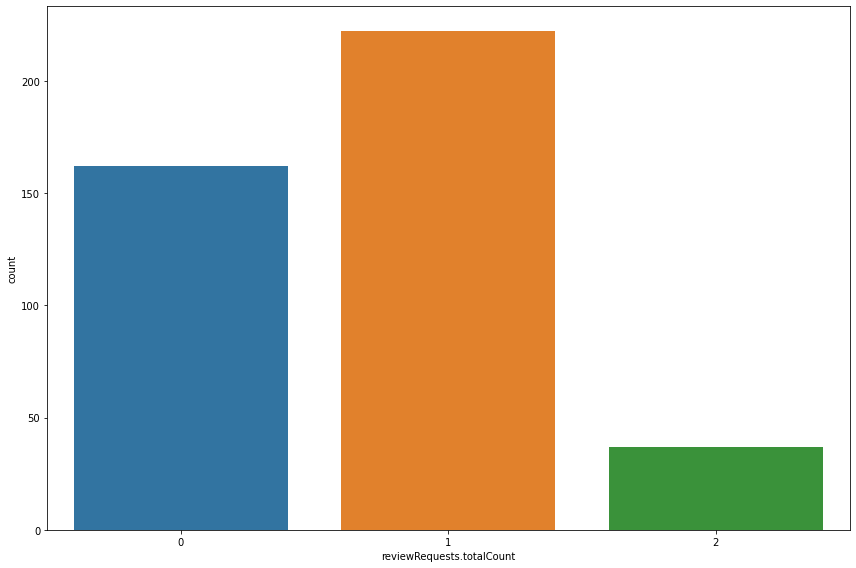

In [21]:
ax = sns.countplot(x=df_merged['reviewRequests.totalCount'], data=df_merged)

# Review comment activity

In [22]:
def getTotalComments(row):
    totalCount = 0
    for review in row:
        totalCount += review['comments']['totalCount']
    return totalCount

In [24]:
df_merged.loc[:,'totalReviewComments'] = df_merged['reviews.nodes'].map(getTotalComments)
df_merged.loc[:,'totalActivity'] = df_merged.totalReviewComments + df_merged.loc[:,'comments.totalCount'] + df_merged.loc[:,'reviews.totalCount']
df_merged.loc[:,'totalReviewCommentsRank'] = df_merged.loc[:,'totalReviewComments'].rank(method='min',pct=True)
df_merged.loc[:,'totalActivityRank'] = df_merged.loc[:,'totalActivity'].rank(method='min',pct=True)

In [25]:
middle_date = df_merged['createdAt'].min() + (df_merged['createdAt'].max() - df_merged['createdAt'].min())/2

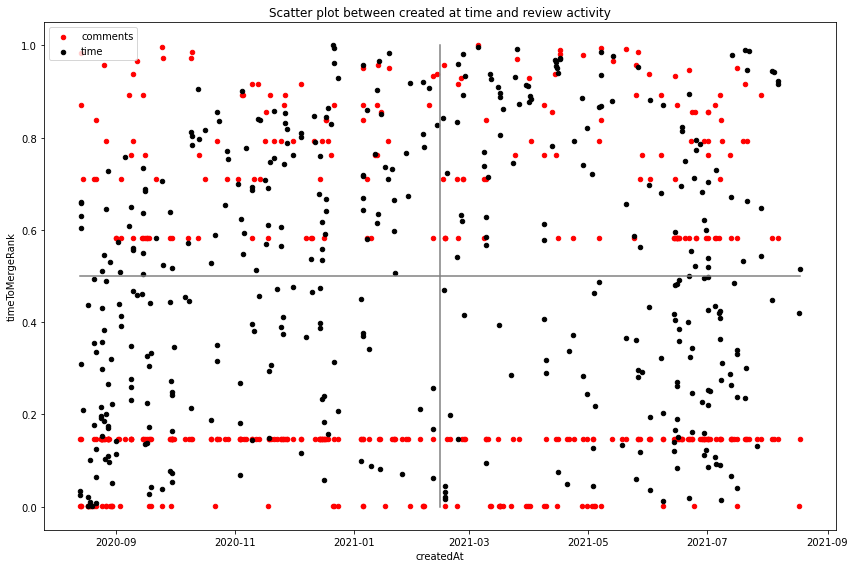

In [26]:
ax = df_merged.plot.scatter(x='createdAt', y='totalActivityRank', title= "Scatter plot between created at time and review activity", color='red', label='comments');
df_merged.plot.scatter(x='createdAt', y='timeToMergeRank', color='Black', ax=ax, label='time');
plt.plot([df_merged['createdAt'].min(), df_merged['createdAt'].max()], [0.5, 0.5], color = 'grey')
plt.plot([middle_date, middle_date], [0, 1], color = 'grey')
plt.show(block=True);

## Explanation:
- The graph above shows both the rank of the time to merge (in black) and the review activity, number of comments made in a pull request, (in red) for each pull request.
- The graph itself is hard to understand because each pull request is represented by a red and black dot. For example for the pull request 50, it's hard to know which is the red and black dots so it's hard to compare them. This why below we do a month by month comparison.

In [27]:
df_merged_july = df_merged[(df_merged.createdAt >= '2021-07-01') & (df_merged.createdAt < '2021-08-01')]

In [28]:
df_merged_june = df_merged[(df_merged.createdAt >= '2021-06-01') & (df_merged.createdAt < '2021-07-01')]

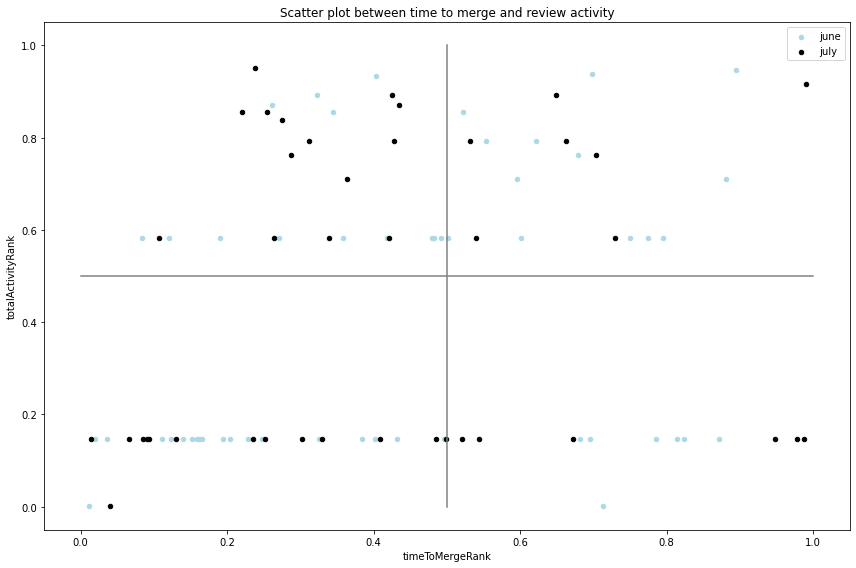

In [29]:
ax = df_merged_june.plot.scatter(x='timeToMergeRank', y='totalActivityRank', title= "Scatter plot between time to merge and review activity", color='LightBlue', label='june');
df_merged_july.plot.scatter(x='timeToMergeRank', y='totalActivityRank', color='Black', ax=ax, label='july');
plt.plot([0, 1], [0.5, 0.5], color = 'grey')
plt.plot([0.5, 0.5], [0, 1], color = 'grey')
plt.show(block=True);

### Analysis:
- In this plot we can see a comparison between the review activity in number of comments and the time to merge.
- Below we check what is the progression from june to july. In particular, how the PRs are evolving in the quadrants.

In [30]:
[len(df_merged_june), len(df_merged_july)]

[52, 41]

In [31]:
q1_june = df_merged_june[(df_merged_june.timeToMergeRank <= 0.5) & (df_merged_june.totalActivityRank <= 0.5)]
q2_june = df_merged_june[(df_merged_june.timeToMergeRank <= 0.5) & (df_merged_june.totalActivityRank > 0.5)]
q3_june = df_merged_june[(df_merged_june.timeToMergeRank > 0.5) & (df_merged_june.totalActivityRank > 0.5)]
q4_june = df_merged_june[(df_merged_june.timeToMergeRank > 0.5) & (df_merged_june.totalActivityRank <= 0.5)]
qs_june = pd.Series([len(q1_june), len(q2_june), len(q3_june), len(q4_june)])

In [32]:
[len(q1_june), len(q2_june), len(q3_june), len(q4_june)]

[19, 13, 13, 7]

In [33]:
qs_june / len(df_merged_june)

0    0.365385
1    0.250000
2    0.250000
3    0.134615
dtype: float64

In [34]:
q1_july = df_merged_july[(df_merged_july.timeToMergeRank <= 0.5) & (df_merged_july.totalActivityRank <= 0.5)]
q2_july = df_merged_july[(df_merged_july.timeToMergeRank <= 0.5) & (df_merged_july.totalActivityRank > 0.5)]
q3_july = df_merged_july[(df_merged_july.timeToMergeRank > 0.5) & (df_merged_july.totalActivityRank > 0.5)]
q4_july = df_merged_july[(df_merged_july.timeToMergeRank > 0.5) & (df_merged_july.totalActivityRank <= 0.5)]
qs_july = pd.Series([len(q1_july), len(q2_july), len(q3_july), len(q4_july)])

In [35]:
[len(q1_july), len(q2_july), len(q3_july), len(q4_july)]

[14, 14, 7, 6]

In [36]:
qs_july / len(df_merged_july)

0    0.341463
1    0.341463
2    0.170732
3    0.146341
dtype: float64

In [37]:
(qs_july / len(df_merged_july)) - (qs_june / len(df_merged_june))

0   -0.023921
1    0.091463
2   -0.079268
3    0.011726
dtype: float64

### Analysis:
- It is the table above that tells us how the team is evolving. We see that PRs are decreasing in Q1 and Q3 and increasing in Q2 and Q4. 
- One of the issues with this analysis is that it considers only the review activity in terms of number of comments.
- We improve on this by defining the "engagement" as the review activity per 100 lines of code changed in the final diff of the PR.

In [38]:
df_merged['totalActivity'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

0.10     0.0
0.20     1.0
0.30     1.0
0.40     1.0
0.50     1.0
0.60     2.0
0.70     2.0
0.80     5.0
0.90     9.0
0.95    15.0
0.99    39.6
1.00    89.0
Name: totalActivity, dtype: float64

In [39]:
df_merged['totalReviewComments'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

0.10     0.0
0.20     0.0
0.30     0.0
0.40     0.0
0.50     0.0
0.60     0.0
0.70     0.0
0.80     2.0
0.90     4.0
0.95     8.0
0.99    27.8
1.00    66.0
Name: totalReviewComments, dtype: float64

In [40]:
df_merged['comments.totalCount'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

0.10    0.0
0.20    0.0
0.30    0.0
0.40    0.0
0.50    0.0
0.60    0.0
0.70    0.0
0.80    0.0
0.90    0.0
0.95    1.0
0.99    2.0
1.00    3.0
Name: comments.totalCount, dtype: float64

In [41]:
df_merged['reviews.totalCount'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1])

0.10     0.0
0.20     1.0
0.30     1.0
0.40     1.0
0.50     1.0
0.60     1.0
0.70     2.0
0.80     3.0
0.90     4.0
0.95     6.0
0.99    12.6
1.00    31.0
Name: reviews.totalCount, dtype: float64

### Analysis:
- As you can see from the tables above, our reviews do not have that much activity.
- 80% of them do not have review comments in the diff
- At least 10% of them are merged without reviews at all 
- 90% of them do have comments around their intention
- In summary, a lot to improve.

## Engagement as a measure of activity per 100 LOC

In [43]:
df_merged.loc[:,'engagement'] = df_merged.totalActivity / ((df_merged.additions + df_merged.deletions) / 100)
df_merged.loc[:,'engagementRank'] = df_merged.loc[:,'engagement'].rank(method='min', pct=True)
df_merged.loc[:,'engagementOnAdditions'] = df_merged.totalActivity / (df_merged.additions / 100)
df_merged.loc[:,'engagementOnAdditionsRank'] = df_merged.loc[:,'engagementOnAdditions'].rank(method='min', pct=True)

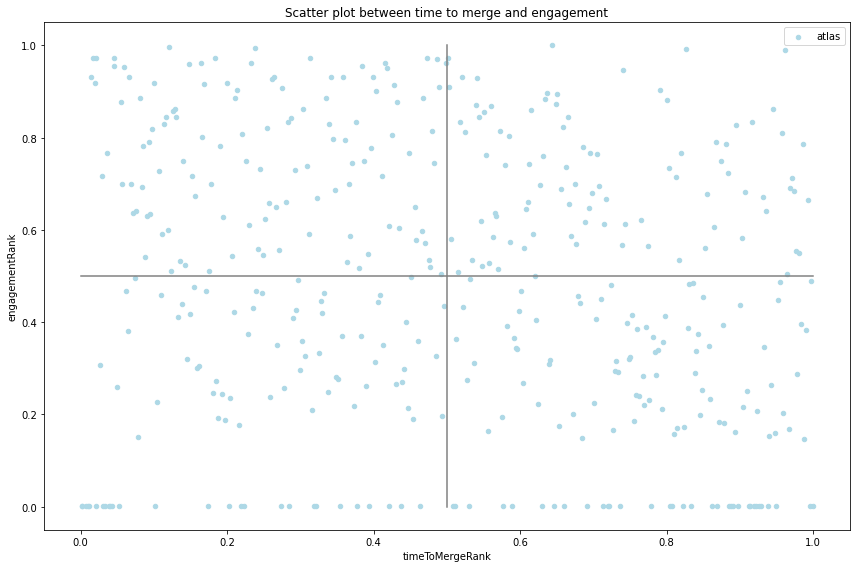

In [44]:
df_merged.plot.scatter(x='timeToMergeRank', y='engagementRank', title= "Scatter plot between time to merge and engagement", color='LightBlue', label='atlas');
plt.plot([0, 1], [0.5, 0.5], color = 'grey')
plt.plot([0.5, 0.5], [0, 1], color = 'grey')
plt.show(block=True);

## Explanation:
- This is the plot that compares engagement with time to merge on all code reviews.
- The missing information is what are the times for these %s in the axis - for example 0.8 on the time to merge is ~70 hours.
- As before the major problem with this plot is that it doesn't show how team is evolving over time. To do that, we compare month by month below.

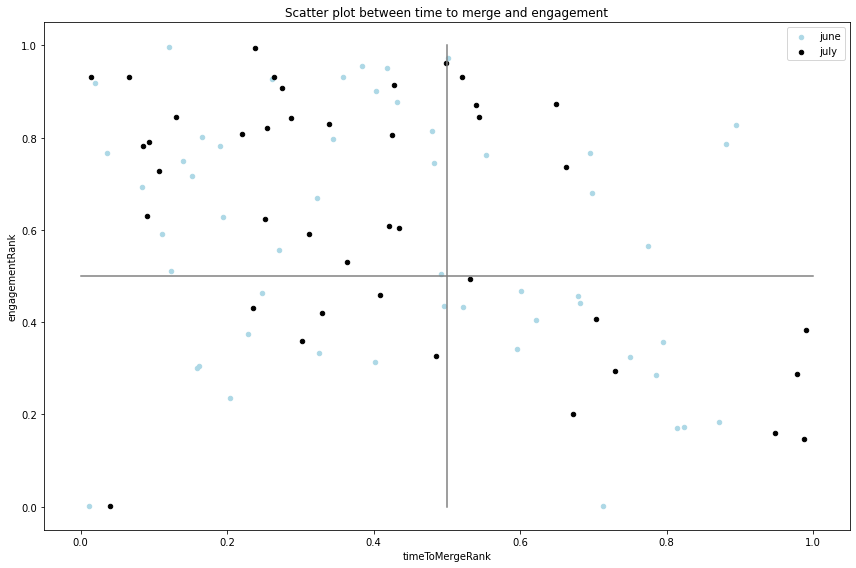

In [45]:
df_merged_july = df_merged[(df_merged.createdAt >= '2021-07-01') & (df_merged.createdAt < '2021-08-01')]
df_merged_june = df_merged[(df_merged.createdAt >= '2021-06-01') & (df_merged.createdAt < '2021-07-01')]
ax = df_merged_june.plot.scatter(x='timeToMergeRank', y='engagementRank', title= "Scatter plot between time to merge and engagement", color='LightBlue', label='june');
df_merged_july.plot.scatter(x='timeToMergeRank', y='engagementRank', color='Black', ax=ax, label='july');
plt.plot([0, 1], [0.5, 0.5], color = 'grey')
plt.plot([0.5, 0.5], [0, 1], color = 'grey')
plt.show(block=True);

## Explanation:
- Here's a comparison of the profile of a team for their pull requests and reviews over two months (June and July).
- As the analysis below will show, the team is evolving in a positive rate PRs are evolving to the quadrant Q2 (top left) that means that engagement is increasing and time to merge is decreasing.

In [46]:
q1_june = df_merged_june[(df_merged_june.timeToMergeRank <= 0.5) & (df_merged_june.engagementRank <= 0.5)]
q2_june = df_merged_june[(df_merged_june.timeToMergeRank <= 0.5) & (df_merged_june.engagementRank > 0.5)]
q3_june = df_merged_june[(df_merged_june.timeToMergeRank > 0.5) & (df_merged_june.engagementRank > 0.5)]
q4_june = df_merged_june[(df_merged_june.timeToMergeRank > 0.5) & (df_merged_june.engagementRank <= 0.5)]
qs_june = pd.Series([len(q1_june), len(q2_june), len(q3_june), len(q4_june)])

In [47]:
[len(q1_june), len(q2_june), len(q3_june), len(q4_june)]

[9, 23, 7, 13]

In [48]:
qs_june / len(df_merged_june)

0    0.173077
1    0.442308
2    0.134615
3    0.250000
dtype: float64

In [49]:
q1_july = df_merged_july[(df_merged_july.timeToMergeRank <= 0.5) & (df_merged_july.engagementRank <= 0.5)]
q2_july = df_merged_july[(df_merged_july.timeToMergeRank <= 0.5) & (df_merged_july.engagementRank > 0.5)]
q3_july = df_merged_july[(df_merged_july.timeToMergeRank > 0.5) & (df_merged_july.engagementRank > 0.5)]
q4_july = df_merged_july[(df_merged_july.timeToMergeRank > 0.5) & (df_merged_july.engagementRank <= 0.5)]
qs_july = pd.Series([len(q1_july), len(q2_july), len(q3_july), len(q4_july)])

In [50]:
[len(q1_july), len(q2_july), len(q3_july), len(q4_july)]

[6, 22, 5, 8]

In [51]:
qs_july / len(df_merged_july)

0    0.146341
1    0.536585
2    0.121951
3    0.195122
dtype: float64

In [52]:
(qs_july / len(df_merged_july)) - (qs_june / len(df_merged_june))

0   -0.026735
1    0.094278
2   -0.012664
3   -0.054878
dtype: float64